In [1]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from pathlib import Path

In [2]:
xlsx_file = Path('mlnew.xlsx')
wb_obj = openpyxl.load_workbook(xlsx_file)
sheet = wb_obj.active 

In [31]:
data = np.empty((sheet.max_row-2, sheet.max_column))
data.fill(-2)

ir = 0
ic = 0

#Iterates trhough each row/cell and places data in $data
for row in sheet.iter_rows(2, max_row = sheet.max_row - 1):
    for cell in row:
        if ic == 0:
            #RESPNO
            data[ir, ic] = cell.value
            
        elif ic == 1:
            #Urban/Rural
            if cell.value == 'Urban':
                data[ir, ic] = 0
            elif cell.value == 'Rural':
                data[ir, ic] = 1
            elif cell.value == 'Tribal':
                data[ir, ic] = 2
            else:
                data[ir, ic] = 3
                
        elif ic == 2:
            #Views on Country's Economic Condition
            if cell.value == "Don't know":
                data[ir, ic] = -1
            elif cell.value == 'Very bad':
                data[ir, ic] = 0
            elif cell.value == 'Fairly bad':
                data[ir, ic] = 1
            elif cell.value == 'Fairly Good':
                data[ir, ic] = 2
            elif cell.value == 'Very good':
                data[ir, ic] = 3
            elif cell.value == 'Neither good nor bad':
                data[ir, ic] = 4
                
        elif ic == 3:
            #Discuss Politics?
            if cell.value == "Don't know":
                data[ir, ic] = -1
            elif cell.value == "Never":
                data[ir, ic] = 0
            elif cell.value == "Occasionally":
                data[ir, ic] = 1
            elif cell.value == "Frequently":
                data[ir, ic] = 2
                
        elif ic == 4:
            #Voted?
            if cell.value == "Don't know":
                data[ir, ic] = -1
            elif cell.value == "You voted in the elections":
                data[ir, ic] = 1
            else:
                data[ir, ic] = 0
            
        elif ic == 5:
            #Requests gov assistance
            if cell.value == "Don't know":
                data[ir, ic] = -1
            elif cell.value == "No, would never do this":
                data[ir, ic] = 0
            elif cell.value == "No, but would do if had the chance":
                data[ir, ic] = 1
            elif cell.value == "Yes, once or twice":
                data[ir, ic] = 2
            elif cell.value == "Yes, several times":
                data[ir, ic] = 3
            elif cell.value == "Yes, often":
                data[ir, ic] = 4
            
            
        elif ic == 6:
            #Corruption
            if cell.value == "Don't know":
                data[ir, ic] = -1
            elif cell.value == "Decreased a lot":
                data[ir, ic] = 0
            elif cell.value == "Decreased somewhat":
                data[ir, ic] = 1
            elif cell.value == "Stayed the same":
                data[ir, ic] = 2
            elif cell.value == "Increased somewhat":
                data[ir, ic] = 3
            elif cell.value == "Increased a lot":
                data[ir, ic] = 4
        elif ic == 7:
            #Education
            invalidStrings = ["Don't know", "Outside the compound", "Inside the house"]
            if cell.value in invalidStrings:
                data[ir, ic] = -1
            elif cell.value == "No formal schooling":
                data[ir, ic] = 0
            elif cell.value == "Informal schooling only":
                data[ir, ic] = 1
            elif cell.value == "Some primary schooling":
                data[ir, ic] = 2
            elif cell.value == "Primary school completed" or cell.value == "Some secondary school / high school":
                data[ir, ic] = 3
            elif cell.value == "Secondary school / high school completed":
                data[ir, ic] = 4
            elif cell.value == "Some university":
                data[ir, ic] = 5
            elif cell.value == "University completed" or cell.value == "Post-graduate" or cell.value == "Post-secondary qualifications, other than university":
                data[ir, ic] = 6
        ic += 1
    ic = 0
    ir += 1

data = np.delete(data, -1, 0)

In [37]:
length = len(data)

train = int(.6*length)
val = int(train+.2*length)

ind = np.arange(length)
np.random.shuffle(ind)
trainingInd = ind[0:train]
validationInd = ind[train:val]
testingInd = ind[val:]

In [40]:
dictHomeVoted = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0
}
dictHome = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0
}
dictEcoVoted = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0
}
dictEco = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0
}
dictDiscussVoted = {
    0 : 0,
    1 : 0,
    2 : 0
}
dictDiscuss = {
    0 : 0,
    1 : 0,
    2 : 0
}
dictGovActionVoted = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0   
}
dictGovAction = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0   
}
dictCorruptVoted = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0
}
dictCorrupt = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0
}
dictEduVoted = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0
}
dictEdu = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0
}
dictVoted = {
    0 : 0,
    1 : 0
}

dictList = [dictVoted, dictHome, dictEco, dictDiscuss, 0, dictGovAction, dictCorrupt, dictEdu, 1, dictHomeVoted, dictEcoVoted, dictDiscussVoted, 1, dictGovActionVoted, dictCorruptVoted, dictEduVoted]

#Splitting into Training, Validation and Testing data
dataTrain = np.take(data, trainingInd, axis=0)
dataVal = np.take(data, validationInd, axis=0)
dataTest = np.take(data, testingInd, axis=0)

In [42]:
#Storing counts of each entry from the training data

for rowCount, row in enumerate(dataTrain):
    if row[4] != -1:
        dictList[0][row[4]] += 1
    for colCount, col in enumerate(row):
        #Need to skip index 0 (RespNo) and index 4 (Voted)
        if colCount == 0 or colCount == 4:
            continue
        else:
            if not -1 in row and not -2 in row:
                if row[4] == 0:
                    dictList[colCount][col] += 1
                else:
                    dictList[colCount + 8][col] += 1

In [44]:
#Training accuracy
resultsTrain = np.zeros((len(dataTrain), 2))
for rowCount, row in enumerate(dataTrain):
    voteProb = 1
    notVoteProb = 1
    #P(row|not voted)
    for count, _dict in enumerate(dictList[:8]):
        if count != 4 and count != 0:
            for i in range(len(_dict)):
                if i == row[count]:
                    voteProb *= (dictList[count+8][i] + 1)/(dictList[0][1] + len(_dict))
                    notVoteProb *= (_dict[i] + 1)/(dictList[0][0] + len(_dict))
                else:
                    voteProb *= (1 - (dictList[count+8][i] + 1)/(dictList[0][1] + len(_dict)))
                    notVoteProb *= (1- (_dict[i] + 1)/(dictList[0][0] + len(_dict)))
    votePrediction = (voteProb*(dictList[0][1]/(dictList[0][0] + dictList[0][1])))/(voteProb*(dictList[0][1]/(dictList[0][0] + dictList[0][1])) + notVoteProb*(dictList[0][0]/(dictList[0][0] + dictList[0][1])))
    if votePrediction > 0.5:
        resultsTrain[rowCount] = np.array([1, row[4]])
    else:
        resultsTrain[rowCount] = np.array([0, row[4]])
        
accuracyTraining = 0
correct = [0, 0]
incorrect = [0, 0]
for row in resultsTrain:
    if row[0] == row[1]:
        accuracyTraining += 1
        correct[int(row[1])] += 1
    else:
        incorrect[int(row[1])] += 1
        

print("Training Accuracy = " + str(accuracyTraining/len(resultsTrain)*100)+"%")
print("Confusion Matrix:")
print("\t\tPredicted: 0\t Predicted:1")
print("\t\t---------------------------------")
print("Actual: 0" + "\t|\t" + str(correct[0]) + "\t|\t" + str(incorrect[0]) + "\t|")
print("\t\t---------------------------------")
print("Actual: 1" + "\t|\t" + str(incorrect[1]) + "\t|\t" + str(correct[1]) + "\t|")
print("\t\t---------------------------------")

Training Accuracy = 65.69945304533235%
Confusion Matrix:
		Predicted: 0	 Predicted:1
		---------------------------------
Actual: 0	|	1623	|	9220	|
		---------------------------------
Actual: 1	|	1880	|	19638	|
		---------------------------------


In [45]:
#Validation accuracy
resultsValidate = np.zeros((len(dataVal), 2))
for rowCount, row in enumerate(dataVal):
    voteProb = 1
    notVoteProb = 1
    #P(row|not voted)
    for count, _dict in enumerate(dictList[:8]):
        if count != 4 and count != 0:
            for i in range(len(_dict)):
                if i == row[count]:
                    voteProb *= (dictList[count+8][i] + 1)/(dictList[0][1] + len(_dict))
                    notVoteProb *= (_dict[i] + 1)/(dictList[0][0] + len(_dict))
                else:
                    voteProb *= (1 - (dictList[count+8][i] + 1)/(dictList[0][1] + len(_dict)))
                    notVoteProb *= (1- (_dict[i] + 1)/(dictList[0][0] + len(_dict)))
    votePrediction = (voteProb*(dictList[0][1]/(dictList[0][0] + dictList[0][1])))/(voteProb*(dictList[0][1]/(dictList[0][0] + dictList[0][1])) + notVoteProb*(dictList[0][0]/(dictList[0][0] + dictList[0][1])))
    if votePrediction > 0.5:
        resultsValidate[rowCount] = np.array([1, row[4]])
    else:
        resultsValidate[rowCount] = np.array([0, row[4]])
        
accuracyValidation = 0
correct = [0, 0]
incorrect = [0, 0]
for row in resultsValidate:
    if row[0] == row[1]:
        accuracyValidation += 1
        correct[int(row[1])] += 1
    else:
        incorrect[int(row[1])] += 1

print("Validation Accuracy = " + str(accuracyValidation/len(resultsValidate)*100)+"%")
print("Confusion Matrix:")
print("\t\tPredicted: 0\t Predicted:1")
print("\t\t---------------------------------")
print("Actual: 0" + "\t|\t" + str(correct[0]) + "\t|\t" + str(incorrect[0]) + "\t|")
print("\t\t---------------------------------")
print("Actual: 1" + "\t|\t" + str(incorrect[1]) + "\t|\t" + str(correct[1]) + "\t|")
print("\t\t---------------------------------")

Validation Accuracy = 66.36692314823398%
Confusion Matrix:
		Predicted: 0	 Predicted:1
		---------------------------------
Actual: 0	|	587	|	3038	|
		---------------------------------
Actual: 1	|	590	|	6572	|
		---------------------------------


In [46]:
#Testing accuracy
resultsTesting = np.zeros((len(dataTest), 2))
for rowCount, row in enumerate(dataTest):
    voteProb = 1
    notVoteProb = 1
    #P(row|not voted)
    for count, _dict in enumerate(dictList[:8]):
        if count != 4 and count != 0:
            for i in range(len(_dict)):
                if i == row[count]:
                    voteProb *= (dictList[count+8][i] + 1)/(dictList[0][1] + len(_dict))
                    notVoteProb *= (_dict[i] + 1)/(dictList[0][0] + len(_dict))
                else:
                    voteProb *= (1 - (dictList[count+8][i] + 1)/(dictList[0][1] + len(_dict)))
                    notVoteProb *= (1- (_dict[i] + 1)/(dictList[0][0] + len(_dict)))
    votePrediction = (voteProb*(dictList[0][1]/(dictList[0][0] + dictList[0][1])))/(voteProb*(dictList[0][1]/(dictList[0][0] + dictList[0][1])) + notVoteProb*(dictList[0][0]/(dictList[0][0] + dictList[0][1])))
    if votePrediction > 0.5:
        resultsTesting[rowCount] = np.array([1, row[4]])
    else:
        resultsTesting[rowCount] = np.array([0, row[4]])
        
accuracyTesting = 0
correct = [0, 0]
incorrect = [0, 0]
for row in resultsTesting:
    if row[0] == row[1]:
        accuracyTesting += 1
        correct[int(row[1])] += 1
    else:
        incorrect[int(row[1])] += 1
print("Testing Accuracy = " + str(accuracyTesting/len(resultsTesting)*100)+"%")
print("Confusion Matrix:")
print("\t\tPredicted: 0\t Predicted:1")
print("\t\t---------------------------------")
print("Actual: 0" + "\t|\t" + str(correct[0]) + "\t|\t" + str(incorrect[0]) + "\t|")
print("\t\t---------------------------------")
print("Actual: 1" + "\t|\t" + str(incorrect[1]) + "\t|\t" + str(correct[1]) + "\t|")
print("\t\t---------------------------------")

Testing Accuracy = 65.50477426531937%
Confusion Matrix:
		Predicted: 0	 Predicted:1
		---------------------------------
Actual: 0	|	568	|	3125	|
		---------------------------------
Actual: 1	|	596	|	6498	|
		---------------------------------


In [108]:
import random

print(random.randint(0, 1))

1


Percent done: 99.9


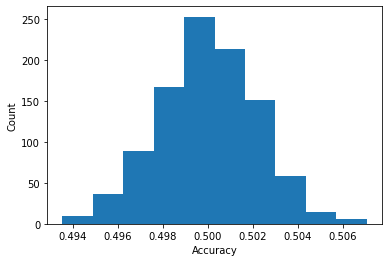

In [132]:
#Random selection
import random
from IPython.display import clear_output
arr = np.array([])

for i in range(1000):
    clear_output(wait=True)
    print("Percent done: " + str((i/1000)*100))
    count = 0
    countCorr = 0
    for row in data:
        if row[4] == random.randint(0, 1):
            countCorr += 1
        count += 1
        
    arr = np.append(arr, countCorr/count)
plt.hist(arr)
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.show()